## Preprocessing Part 1

Functions should take in a dataframe with two columns: ['target'] and ['text'] (in that order), and return the same. Everything in between is up to you.

### Importing and arranging data

In [1]:
pip install -U nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn import preprocessing
import string
import re
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mohammad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mohammad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mohammad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mohammad/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Processed dataset

In [5]:
df1 = pd.read_csv("MBTI 500.csv")
df1

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


#### Unprocessed datasets

In [6]:
df2 = pd.read_csv("twitter_MBTI.csv")

In [7]:
df2.drop(df2.columns[0], axis=1, inplace=True)

In [8]:
df2 = df2.rename(columns={'text': 'text', 'label': 'type'})
df2

,text,type
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,@Hispanthicckk Being you makes you look cute||...,intj
2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj
...,...,...
7806,"@sobsjjun God,,pls take care 😕|||@sobsjjun Hir...",intp
7807,@Ignis_02 wow last time i got intp https://t.c...,intp
7808,@akupilled A 100%|||@akupilled That SOMEONE wi...,entp
7809,If you’re #INTJ this one is for you | What is ...,infj


In [9]:
df3 = pd.read_csv("mbti_1.csv")

In [10]:
df3 = df3[['posts', 'type']]
df3 = df3.rename(columns={'posts': 'text', 'type': 'type'})
df3

,text,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ
1,'I'm finding the lack of me in these posts ver...,ENTP
2,'Good one _____ https://www.youtube.com/wat...,INTP
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ
4,'You're fired.|||That's another silly misconce...,ENTJ
...,...,...
8670,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP
8671,'So...if this thread already exists someplace ...,ENFP
8672,'So many questions when i do these things. I ...,INTP
8673,'I am very conflicted right now when it comes ...,INFP


#### Combing unprocessed datasets

In [11]:
combined_df = pd.concat([df2, df3], axis=0)
combined_df['type'] = combined_df['type'].str.upper()
combined_df

,text,type
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,INTJ
1,@Hispanthicckk Being you makes you look cute||...,INTJ
2,@Alshymi Les balles sont réelles et sont tirée...,INTJ
3,"I'm like entp but idiotic|||Hey boy, do you wa...",INTJ
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,INTJ
...,...,...
8670,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP
8671,'So...if this thread already exists someplace ...,ENFP
8672,'So many questions when i do these things. I ...,INTP
8673,'I am very conflicted right now when it comes ...,INFP


In [12]:
def split_targets(dataframe):
    dataframe['e_i'] = dataframe['type'].astype(str).str[0]
    dataframe['s_n'] = dataframe['type'].astype(str).str[1]
    dataframe['f_t'] = dataframe['type'].astype(str).str[2]
    dataframe['p_j'] = dataframe['type'].astype(str).str[3]
    return dataframe

In [13]:
combined_df = split_targets(combined_df)
combined_df

,text,type,e_i,s_n,f_t,p_j
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,INTJ,I,N,T,J
1,@Hispanthicckk Being you makes you look cute||...,INTJ,I,N,T,J
2,@Alshymi Les balles sont réelles et sont tirée...,INTJ,I,N,T,J
3,"I'm like entp but idiotic|||Hey boy, do you wa...",INTJ,I,N,T,J
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP,I,S,F,P
8671,'So...if this thread already exists someplace ...,ENFP,E,N,F,P
8672,'So many questions when i do these things. I ...,INTP,I,N,T,P
8673,'I am very conflicted right now when it comes ...,INFP,I,N,F,P


### Text Cleaning

#### Remove URLs

In [14]:
def remove_urls(data):
    data = re.sub(r'http\S+|www.\S+', '', data)
    
    return data

In [15]:
combined_df['text'] = combined_df['text'].apply(remove_urls)
combined_df

,text,type,e_i,s_n,f_t,p_j
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,INTJ,I,N,T,J
1,@Hispanthicckk Being you makes you look cute||...,INTJ,I,N,T,J
2,@Alshymi Les balles sont réelles et sont tirée...,INTJ,I,N,T,J
3,"I'm like entp but idiotic|||Hey boy, do you wa...",INTJ,I,N,T,J
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,' just because I always think of cats as Fi do...,ISFP,I,S,F,P
8671,'So...if this thread already exists someplace ...,ENFP,E,N,F,P
8672,'So many questions when i do these things. I ...,INTP,I,N,T,P
8673,'I am very conflicted right now when it comes ...,INFP,I,N,F,P


#### remove social media handles

In [16]:
def remove_handles(data):
    data = re.sub(r'@\w+', '', data)
    return data

In [17]:
combined_df['text'] = combined_df['text'].apply(remove_handles)
combined_df

,text,type,e_i,s_n,f_t,p_j
0,"The Pope is infallible, this is a catholic ...",INTJ,I,N,T,J
1,"Being you makes you look cute||| On, because ...",INTJ,I,N,T,J
2,Les balles sont réelles et sont tirées très r...,INTJ,I,N,T,J
3,"I'm like entp but idiotic|||Hey boy, do you wa...",INTJ,I,N,T,J
4,Give it to ... He has Pica since childhood||...,INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,' just because I always think of cats as Fi do...,ISFP,I,S,F,P
8671,'So...if this thread already exists someplace ...,ENFP,E,N,F,P
8672,'So many questions when i do these things. I ...,INTP,I,N,T,P
8673,'I am very conflicted right now when it comes ...,INFP,I,N,F,P


#### remove punctuation

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def punctuation(data):
    for punctuation in string.punctuation:
            data = data.replace(punctuation, '')
    return data

In [20]:
combined_df['text'] = combined_df['text'].apply(punctuation)
combined_df

,text,type,e_i,s_n,f_t,p_j
0,The Pope is infallible this is a catholic d...,INTJ,I,N,T,J
1,Being you makes you look cute On because then...,INTJ,I,N,T,J
2,Les balles sont réelles et sont tirées très r...,INTJ,I,N,T,J
3,Im like entp but idioticHey boy do you want to...,INTJ,I,N,T,J
4,Give it to He has Pica since childhood Say ...,INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,just because I always think of cats as Fi dom...,ISFP,I,S,F,P
8671,Soif this thread already exists someplace else...,ENFP,E,N,F,P
8672,So many questions when i do these things I wo...,INTP,I,N,T,P
8673,I am very conflicted right now when it comes t...,INFP,I,N,F,P


#### lowercase

In [21]:
def lower_case(data):
    return data.lower()

In [22]:
combined_df['text'] = combined_df['text'].apply(lower_case)
combined_df

,text,type,e_i,s_n,f_t,p_j
0,the pope is infallible this is a catholic d...,INTJ,I,N,T,J
1,being you makes you look cute on because then...,INTJ,I,N,T,J
2,les balles sont réelles et sont tirées très r...,INTJ,I,N,T,J
3,im like entp but idiotichey boy do you want to...,INTJ,I,N,T,J
4,give it to he has pica since childhood say ...,INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,just because i always think of cats as fi dom...,ISFP,I,S,F,P
8671,soif this thread already exists someplace else...,ENFP,E,N,F,P
8672,so many questions when i do these things i wo...,INTP,I,N,T,P
8673,i am very conflicted right now when it comes t...,INFP,I,N,F,P


#### remove special characters

In [23]:
def remove_special_characters(data):
    data = re.sub(r'[^A-Za-z0-9\s]+', '', data)
    return data

In [24]:
combined_df['text'] = combined_df['text'].apply(remove_special_characters)
combined_df

,text,type,e_i,s_n,f_t,p_j
0,the pope is infallible this is a catholic d...,INTJ,I,N,T,J
1,being you makes you look cute on because then...,INTJ,I,N,T,J
2,les balles sont relles et sont tires trs rapi...,INTJ,I,N,T,J
3,im like entp but idiotichey boy do you want to...,INTJ,I,N,T,J
4,give it to he has pica since childhood say ...,INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,just because i always think of cats as fi dom...,ISFP,I,S,F,P
8671,soif this thread already exists someplace else...,ENFP,E,N,F,P
8672,so many questions when i do these things i wo...,INTP,I,N,T,P
8673,i am very conflicted right now when it comes t...,INFP,I,N,F,P


#### remove white space

In [25]:
def white_space(data):
    return data.strip()

In [26]:
combined_df['text'] = combined_df['text'].apply(white_space)
combined_df

,text,type,e_i,s_n,f_t,p_j
0,the pope is infallible this is a catholic dogm...,INTJ,I,N,T,J
1,being you makes you look cute on because then ...,INTJ,I,N,T,J
2,les balles sont relles et sont tires trs rapid...,INTJ,I,N,T,J
3,im like entp but idiotichey boy do you want to...,INTJ,I,N,T,J
4,give it to he has pica since childhood say q...,INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,just because i always think of cats as fi doms...,ISFP,I,S,F,P
8671,soif this thread already exists someplace else...,ENFP,E,N,F,P
8672,so many questions when i do these things i wo...,INTP,I,N,T,P
8673,i am very conflicted right now when it comes t...,INFP,I,N,F,P


### Tokenizing

In [27]:
def tokenize(data):
    data = word_tokenize(data)
    return data

In [28]:
combined_df['text'] = combined_df['text'].apply(tokenize)
combined_df

,text,type,e_i,s_n,f_t,p_j
0,"[the, pope, is, infallible, this, is, a, catho...",INTJ,I,N,T,J
1,"[being, you, makes, you, look, cute, on, becau...",INTJ,I,N,T,J
2,"[les, balles, sont, relles, et, sont, tires, t...",INTJ,I,N,T,J
3,"[im, like, entp, but, idiotichey, boy, do, you...",INTJ,I,N,T,J
4,"[give, it, to, he, has, pica, since, childhood...",INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,"[just, because, i, always, think, of, cats, as...",ISFP,I,S,F,P
8671,"[soif, this, thread, already, exists, someplac...",ENFP,E,N,F,P
8672,"[so, many, questions, when, i, do, these, thin...",INTP,I,N,T,P
8673,"[i, am, very, conflicted, right, now, when, it...",INFP,I,N,F,P


In [29]:
combined_df['list_length'] = combined_df['text'].apply(len)

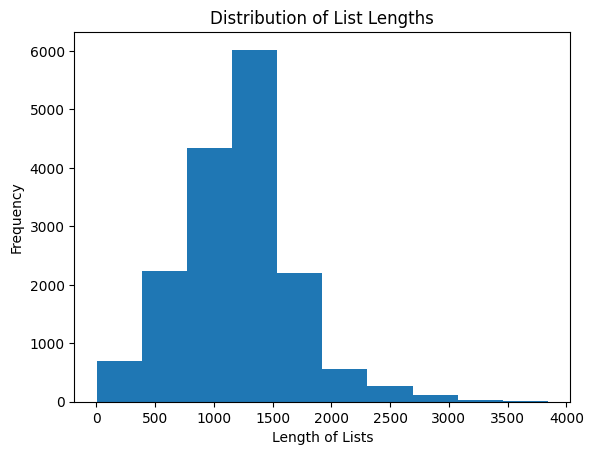

In [30]:
plt.hist(combined_df['list_length'], bins=10)
plt.xlabel('Length of Lists')
plt.ylabel('Frequency')
plt.title('Distribution of List Lengths')
plt.show()

In [32]:
combined_df.drop(columns=['list_length'], inplace=True)

In [33]:
combined_df

,text,type,e_i,s_n,f_t,p_j
0,"[the, pope, is, infallible, this, is, a, catho...",INTJ,I,N,T,J
1,"[being, you, makes, you, look, cute, on, becau...",INTJ,I,N,T,J
2,"[les, balles, sont, relles, et, sont, tires, t...",INTJ,I,N,T,J
3,"[im, like, entp, but, idiotichey, boy, do, you...",INTJ,I,N,T,J
4,"[give, it, to, he, has, pica, since, childhood...",INTJ,I,N,T,J
...,...,...,...,...,...,...
8670,"[just, because, i, always, think, of, cats, as...",ISFP,I,S,F,P
8671,"[soif, this, thread, already, exists, someplac...",ENFP,E,N,F,P
8672,"[so, many, questions, when, i, do, these, thin...",INTP,I,N,T,P
8673,"[i, am, very, conflicted, right, now, when, it...",INFP,I,N,F,P


In [34]:
def split_rows(dataframe):
    new_data = []
    for index, row in dataframe.iterrows():
        type_value = row['type']
        text_value = row['text']
        if len(text_value) == 500:
            new_data.append([type_value, text_value, len(text_value)])

        if len(text_value) > 500:
            num_splits = len(text_value) // 500
#             remainder = len(clean_text_value) % 500
            for i in range(num_splits):
                new_data.append([type_value, text_value[i * 500: (i + 1) * 500], len(text_value[i * 500: (i + 1) * 500])])

#if you want to add text thats less than 500 use code below

        #  if remainder > 0:
# #                 new_data.append([type_value, text_value[-remainder:], len(text_value[-remainder:])])
#        else:
#            new_data.append([type_value, text_value, len(text_value)])
    dataframe = pd.DataFrame(new_data, columns=['type', 'text', 'length'])
    return dataframe


In [35]:
new_df = split_rows(combined_df)
new_df
# combined_df_new = combined_df.apply(split_rows)
# combined_df_new

,type,text,length
0,INTJ,"[the, pope, is, infallible, this, is, a, catho...",500
1,INTJ,"[in, hell, and, im, tired, of, pretending, we,...",500
2,INTJ,"[ahh, ahh, so, when, i, worship, jesus, christ...",500
3,INTJ,"[the, bible, says, she, was, a, virgin, eugene...",500
4,INTJ,"[being, you, makes, you, look, cute, on, becau...",500
...,...,...,...
31413,INFP,"[i, am, very, conflicted, right, now, when, it...",500
31414,INFP,"[heisnt, he, gay, thing, at, all, sorry, howev...",500
31415,INFP,"[done, with, the, dovekeepers, by, alice, hoff...",500
31416,INFP,"[it, has, been, too, long, since, i, have, bee...",500


In [36]:
def split_targets1(dataframe):
    e_i_df = dataframe[['text', 'type']].copy()
    e_i_df['type'] = e_i_df['type'].astype(str).str[0]

    s_n_df = dataframe[['text', 'type']].copy()
    s_n_df['type'] = s_n_df['type'].astype(str).str[1]

    f_t_df = dataframe[['text', 'type']].copy()
    f_t_df['type'] = f_t_df['type'].astype(str).str[2]

    p_j_df = dataframe[['text', 'type']].copy()
    p_j_df['type'] = p_j_df['type'].astype(str).str[3]

    return e_i_df, s_n_df, f_t_df, p_j_df

In [38]:
df_1, df_2, df_3, df_4 = split_targets1(new_df)
df_1, df_2, df_3, df_4

(                                                    text type
 0      [the, pope, is, infallible, this, is, a, catho...    I
 1      [in, hell, and, im, tired, of, pretending, we,...    I
 2      [ahh, ahh, so, when, i, worship, jesus, christ...    I
 3      [the, bible, says, she, was, a, virgin, eugene...    I
 4      [being, you, makes, you, look, cute, on, becau...    I
 ...                                                  ...  ...
 31413  [i, am, very, conflicted, right, now, when, it...    I
 31414  [heisnt, he, gay, thing, at, all, sorry, howev...    I
 31415  [done, with, the, dovekeepers, by, alice, hoff...    I
 31416  [it, has, been, too, long, since, i, have, bee...    I
 31417  [mind, in, a, time, of, need, or, emotion, not...    I
 
 [31418 rows x 2 columns],
                                                     text type
 0      [the, pope, is, infallible, this, is, a, catho...    N
 1      [in, hell, and, im, tired, of, pretending, we,...    N
 2      [ahh, ahh, so, whe

In [47]:
def binarize_and_adjust(dataframe):
    # Binarize the "type" column
    dataframe['binary_type'] = dataframe['type'].apply(lambda x: 1 if x == dataframe['type'].iloc[0] else 0)
    
    # Calculate the length of each binary value
    length_1 = dataframe[dataframe['binary_type'] == 1].shape[0]
    length_0 = dataframe[dataframe['binary_type'] == 0].shape[0]
    
    # Determine the value with fewer rows
    min_length = min(length_1, length_0)
    
    # Adjust the number of rows to match the value with fewer rows
    dataframe_adjusted = pd.concat([dataframe[dataframe['binary_type'] == 1].head(min_length),
                             dataframe[dataframe['binary_type'] == 0].head(min_length)])
    
    dataframe_adjusted.drop(columns=['binary_type'], inplace=True)
    
    # Restore the original "type" values
    dataframe_adjusted['type'] = dataframe['type']
    
    return dataframe_adjusted


In [48]:
df1_adjusted = binarize_and_adjust(df_1)
df2_adjusted = binarize_and_adjust(df_2)
df3_adjusted = binarize_and_adjust(df_3)
df4_adjusted = binarize_and_adjust(df_4)

In [49]:
df1_adjusted

,text,type
0,"[the, pope, is, infallible, this, is, a, catho...",I
1,"[in, hell, and, im, tired, of, pretending, we,...",I
2,"[ahh, ahh, so, when, i, worship, jesus, christ...",I
3,"[the, bible, says, she, was, a, virgin, eugene...",I
4,"[being, you, makes, you, look, cute, on, becau...",I
...,...,...
31400,"[forum, the, baby, boom, is, a, demographic, e...",E
31403,"[i, think, generally, people, experience, post...",E
31404,"[thing, i, would, add, is, that, you, need, to...",E
31410,"[soif, this, thread, already, exists, someplac...",E


### count of rows BEFORE over-sampling data

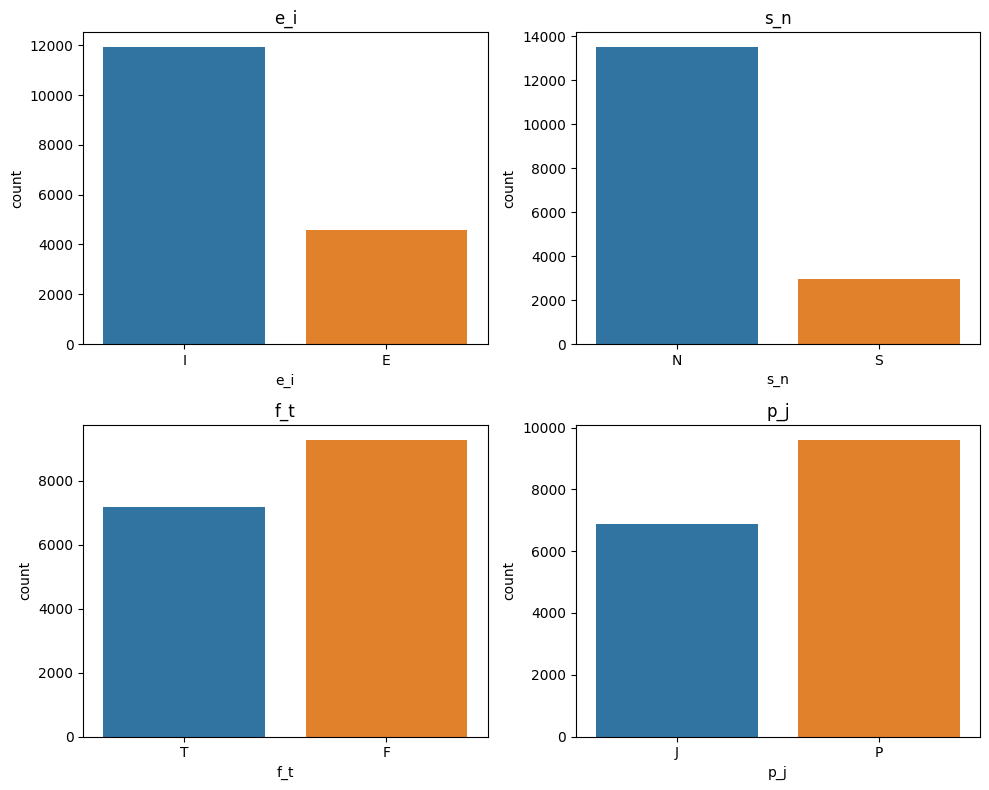

In [44]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot e_i column
ax1 = axes[0, 0]
sns.countplot(data=combined_df, x='e_i', ax=ax1)
ax1.set_title('e_i')

# Plot s_n column
ax2 = axes[0, 1]
sns.countplot(data=combined_df, x='s_n', ax=ax2)
ax2.set_title('s_n')

# Plot f_t column
ax3 = axes[1, 0]
sns.countplot(data=combined_df, x='f_t', ax=ax3)
ax3.set_title('f_t')

# Plot p_j column
ax4 = axes[1, 1]
sns.countplot(data=combined_df, x='p_j', ax=ax4)
ax4.set_title('p_j')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### count of rows AFTER over-sampling all data

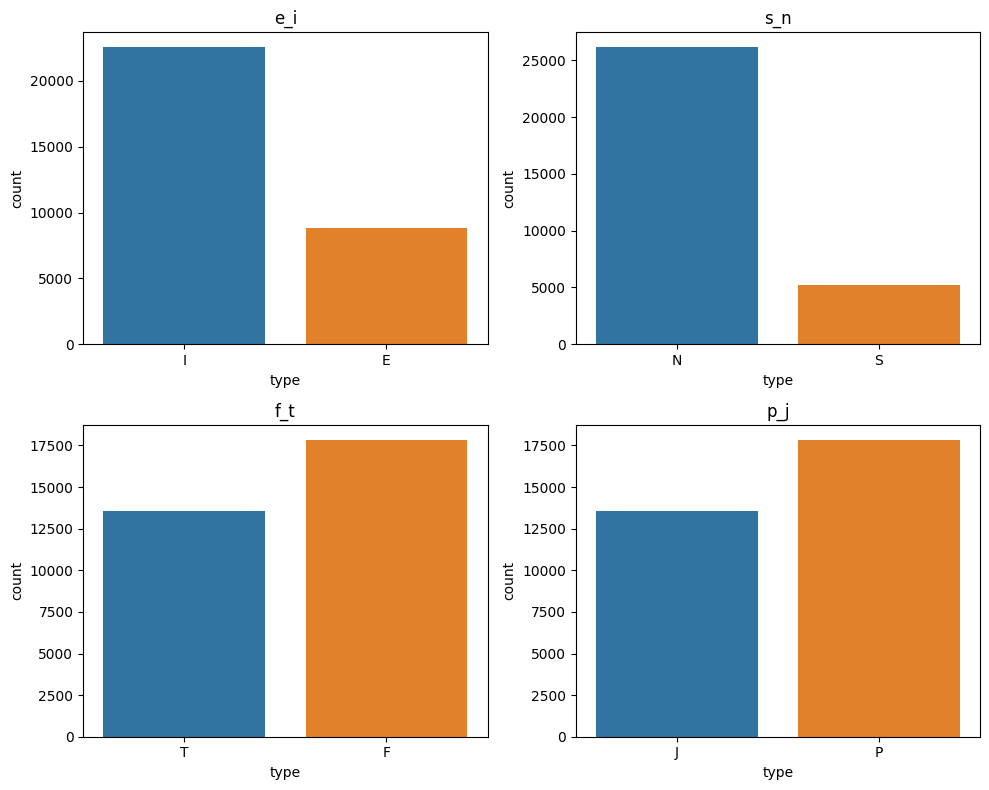

In [45]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot e_i column
ax1 = axes[0, 0]
sns.countplot(data=df_1, x='type', ax=ax1)
ax1.set_title('e_i')

# Plot s_n column
ax2 = axes[0, 1]
sns.countplot(data=df_2, x='type', ax=ax2)
ax2.set_title('s_n')

# Plot f_t column
ax3 = axes[1, 0]
sns.countplot(data=df_3, x='type', ax=ax3)
ax3.set_title('f_t')

# Plot p_j column
ax4 = axes[1, 1]
sns.countplot(data=df_4, x='type', ax=ax4)
ax4.set_title('p_j')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### count of rows AFTER over-sampling small data and under-sampling bigger data

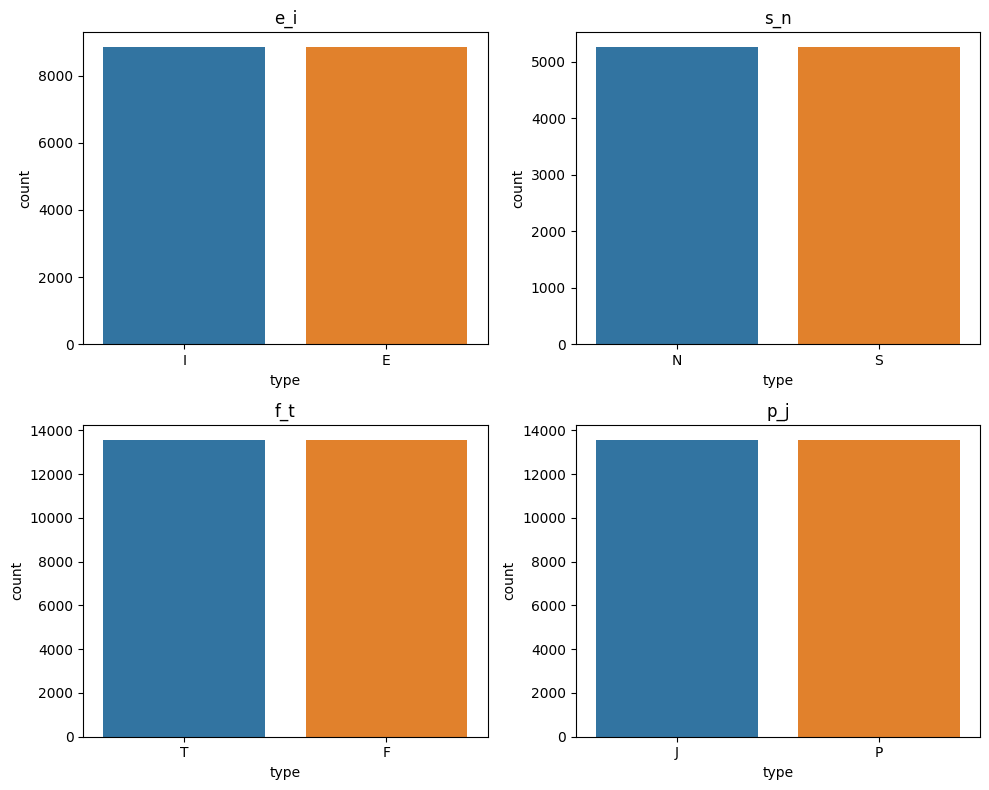

In [46]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot e_i column
ax1 = axes[0, 0]
sns.countplot(data=df1_adjusted, x='type', ax=ax1)
ax1.set_title('e_i')

# Plot s_n column
ax2 = axes[0, 1]
sns.countplot(data=df2_adjusted, x='type', ax=ax2)
ax2.set_title('s_n')

# Plot f_t column
ax3 = axes[1, 0]
sns.countplot(data=df3_adjusted, x='type', ax=ax3)
ax3.set_title('f_t')

# Plot p_j column
ax4 = axes[1, 1]
sns.countplot(data=df4_adjusted, x='type', ax=ax4)
ax4.set_title('p_j')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
def split_rows(dataframe):
    new_data = []
    num = 500
    persona = ["INTJ", "INTP", "INFJ", "INFP"]
    for index, row in dataframe.iterrows():
        type_value = row['type']
        clean_text_value = row['clean_text']
        if len(clean_text_value) >= num and type_value in persona:
            new_data.append([type_value, clean_text_value[:num], len(clean_text_value)])
        if len(clean_text_value) >= num and type_value not in persona:
            num_splits = len(clean_text_value) // num

            for i in range(num_splits):
                new_data.append([type_value, clean_text_value[i * num: (i + 1) * num], len(clean_text_value[i * num: (i + 1) * 500])])


    dataframe = pd.DataFrame(new_data, columns=['type', 'clean_text', 'length'])
    return dataframe


In [ ]:
new_df2 = split_rows(combined_df)
new_df2

In [ ]:
ax = plt.subplot()

# Histogram for Quick Barplot with Counts on Top
sns.histplot(new_df2['type'])
ax.bar_label(ax.containers[0], fmt='Count:\n%.0f', label_type='edge')
ax.figure.set_figwidth(15)
ax.figure.set_figheight(7)


In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot e_i column
ax1 = axes[0, 0]
sns.countplot(data=df_1, x='type', ax=ax1)
ax1.set_title('e_i')

# Plot s_n column
ax2 = axes[0, 1]
sns.countplot(data=df_2, x='type', ax=ax2)
ax2.set_title('s_n')

# Plot f_t column
ax3 = axes[1, 0]
sns.countplot(data=df_3, x='type', ax=ax3)
ax3.set_title('f_t')

# Plot p_j column
ax4 = axes[1, 1]
sns.countplot(data=df_4, x='type', ax=ax4)
ax4.set_title('p_j')

# Adjust the layout
plt.tight_layout()

In [ ]:
def split_rows(dataframe):
    new_data = []
    for index, row in dataframe.iterrows():
        type_value = row['type']
        text_value = row['text']
        if len(text_value) == 500:
            new_data.append([type_value, text_value, len(text_value)])

        if len(text_value) > 500:
            num_splits = len(text_value) // 500
#             remainder = len(clean_text_value) % 500
            for i in range(num_splits):
                new_data.append([type_value, text_value[i * 500: (i + 1) * 500], len(text_value[i * 500: (i + 1) * 500])])

#if you want to add text thats less than 500 use code below

        #  if remainder > 0:
# #                 new_data.append([type_value, text_value[-remainder:], len(text_value[-remainder:])])
#        else:
#            new_data.append([type_value, text_value, len(text_value)])
    dataframe = pd.DataFrame(new_data, columns=['type', 'text', 'length'])
    return dataframe


In [ ]:
df_1, df_2, df_3, df_4 = split_rows(df_1), split_rows(df_2), split_rows(df_3), split_rows(df_4)
df_1, df_2, df_3, df_4

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot e_i column
ax1 = axes[0, 0]
sns.countplot(data=df_1, x='type', ax=ax1)
ax1.set_title('e_i')

# Plot s_n column
ax2 = axes[0, 1]
sns.countplot(data=df_2, x='type', ax=ax2)
ax2.set_title('s_n')

# Plot f_t column
ax3 = axes[1, 0]
sns.countplot(data=df_3, x='type', ax=ax3)
ax3.set_title('f_t')

# Plot p_j column
ax4 = axes[1, 1]
sns.countplot(data=df_4, x='type', ax=ax4)
ax4.set_title('p_j')

# Adjust the layout
plt.tight_layout()

### Stopword Removal

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def stopwords(data):
    data = [w for w in data if w not in stop_words] 
    return data

In [ ]:
combined_df['clean_text'] = combined_df['clean_text'].apply(stopwords)
combined_df

### Text Lemmatization

In [ ]:
def lemmatize(data):

    # Lemmatizing the verbs
    data = [WordNetLemmatizer().lemmatize(word, pos = "v") for word in data]

    # Lemmatizing the nouns
    data = [WordNetLemmatizer().lemmatize(word, pos = "n") for word in data]
    
    return ' '.join(data)

In [ ]:
combined_df['clean_text'] = combined_df['clean_text'].apply(lemmatize)
combined_df

### Testing different embedding models

#### tfidf-multinominalNB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import set_config; set_config("diagram")

In [ ]:
X = combined_df['clean_text']
y = combined_df['type']

In [ ]:
# Create Pipeline
pipeline_naive_bayes = make_pipeline(
    TfidfVectorizer(), 
    MultinomialNB()
)

# Set parameters to search
parameters = {
    "tfidfvectorizer__ngram_range": [(1,1), (1,2), (2,2)], 
    "tfidfvectorizer__max_df": [0.5, 0.75, 1.0],
    "multinomialnb__alpha": [0.01, 0.1, 1.0, 10.0]
}
    
# Perform grid search on pipeline
grid_search = GridSearchCV(pipeline_naive_bayes, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

In [ ]:
best_estimator = grid_search.best_estimator_

In [ ]:
best_estimator

In [ ]:
grid_search.best_score_

#### tfidf-LDA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
vectorized_documents = vectorizer.fit_transform(X)
vectorized_documents = pd.DataFrame(
    vectorized_documents.toarray(), 
    columns = vectorizer.get_feature_names_out()
)

vectorized_documents

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_documents, y, test_size=0.2, random_state=42)


In [ ]:
# Instantiate and fit the classifier on the training set
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)